In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [177]:
sns.set()

В домашнем задании нужно решить задачу классификации физических лиц по уровню дохода. Данные для обучения модели хранятся в файле adult.csv, который можно найти в материалах к занятию или скачать с сайта.

Целевая переменная – уровень дохода income, который принимает два значения <=50K и >50K, поэтому классификация бинарная. Остальные признаки описывают персональную информацию – возраст, образование, семейное положение и т. д. Подробное описание признаков и их возможные значения можно получить самостоятельно, используя функции Python3 для анализа датасета (describe, unique и т.д) или прочитать информацию по ссылке.

Задачу классификации нужно решить при помощи обучения модели логистической регрессии и модели опорных векторов.

Этапы работы:

1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)
2. Проведите первичный анализ.
3. Проверьте данные на пропуски. Удалите в случае обнаружения.

In [178]:
general_path = '/content/drive/MyDrive/Netology_homeworks/Machine_Learning/02.Logistic_Regression_SVM'

In [179]:
adult_path = '/adult.csv'

In [180]:
adult_data = pd.read_csv(general_path + adult_path)

In [181]:
adult_data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [182]:
adult_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [183]:
adult_data.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [184]:
a_d_cols = adult_data.columns

In [185]:
# Количество пропусков в колонках:

for col in a_d_cols:
  if(adult_data[col].dtype == 'O'):
    print(col, ':', len(adult_data[adult_data[col] == '?']), ', процент от общего: ', round((len(adult_data[adult_data[col] == '?']) / len(adult_data) * 100), 2), '%')

workclass : 2799 , процент от общего:  5.73 %
education : 0 , процент от общего:  0.0 %
marital-status : 0 , процент от общего:  0.0 %
occupation : 2809 , процент от общего:  5.75 %
relationship : 0 , процент от общего:  0.0 %
race : 0 , процент от общего:  0.0 %
gender : 0 , процент от общего:  0.0 %
native-country : 857 , процент от общего:  1.75 %
income : 0 , процент от общего:  0.0 %


In [186]:
# Удалил строки по пропускам в колонке с наибольшим кол-вом пропусков (occupation), после чего проверил повторно
# и оказалось, что осталось 1,75% пропусков в колонке native-country, поэтому удалил строки и по пропускам в этой колонке:

adult_data = adult_data[(adult_data['occupation'] != '?') & (adult_data['native-country'] != '?')]

In [187]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


In [188]:
# Повторная проверка на количество пропусков в строковых колонках:

for col in a_d_cols:
  if(adult_data[col].dtype == 'O'):
    print(col, ':', len(adult_data[adult_data[col] == '?']), ', процент от общего: ', round((len(adult_data[adult_data[col] == '?']) / len(adult_data) * 100), 2), '%')

workclass : 0 , процент от общего:  0.0 %
education : 0 , процент от общего:  0.0 %
marital-status : 0 , процент от общего:  0.0 %
occupation : 0 , процент от общего:  0.0 %
relationship : 0 , процент от общего:  0.0 %
race : 0 , процент от общего:  0.0 %
gender : 0 , процент от общего:  0.0 %
native-country : 0 , процент от общего:  0.0 %
income : 0 , процент от общего:  0.0 %


In [189]:
adult_data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [190]:
print(adult_data['workclass'].unique())
print(adult_data['education'].unique())
print(adult_data['marital-status'].unique())
print(adult_data['occupation'].unique())
print(adult_data['relationship'].unique())
print(adult_data['race'].unique())
print(adult_data['gender'].unique())
print(adult_data['native-country'].unique())
print(adult_data['income'].unique())
print(adult_data['hours-per-week'].unique())

['Private' 'Local-gov' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay']
['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' '5th-6th' 'Assoc-voc' '9th' 'Doctorate'
 '12th' '1st-4th' 'Preschool']
['Never-married' 'Married-civ-spouse' 'Widowed' 'Separated' 'Divorced'
 'Married-spouse-absent' 'Married-AF-spouse']
['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' 'Other-service'
 'Prof-specialty' 'Craft-repair' 'Adm-clerical' 'Exec-managerial'
 'Tech-support' 'Sales' 'Priv-house-serv' 'Transport-moving'
 'Handlers-cleaners' 'Armed-Forces']
['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']
['Black' 'White' 'Other' 'Amer-Indian-Eskimo' 'Asian-Pac-Islander']
['Male' 'Female']
['United-States' 'Peru' 'Guatemala' 'Mexico' 'Dominican-Republic'
 'Ireland' 'Germany' 'Philippines' 'Thailand' 'Haiti' 'El-Salvador'
 'Puerto-Rico' 'Vietnam' 'South' 'Columbia' 'Japan' 'India' 'Cambodia'
 'Poland'

Предложите альтернативный способ работы с пропусками

Постройте 1-2 графика на выбор. 

Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)

Преобразуйте категориальные признаки.

In [254]:
# Альтернативный метод - заполнение какими-л. значениями (e.g. средними значениями, предыдущим/последующим значением и т.д.), но так как признаки с пропусками категориальные и пропусков относительно немного, решил
# избавиться от данных с пропусками 

In [191]:
X = pd.get_dummies(adult_data, columns=['education', 'income'])   # Данные для построения таблиц, сводных таблиц

In [255]:
# Функция, категоризирующая количество рабочих часов (подумал будет интересно оценить зависимость кол-ва рабочих часов в неделю и уровня дохода)

def hours_categorizer(data_set: pd.core.frame.DataFrame):
  if data_set['hours-per-week'] <= 10:
    return ' <=10'
  elif(data_set['hours-per-week'] > 10 and data_set['hours-per-week'] <= 30):
    return '11-30'
  elif(data_set['hours-per-week'] > 30 and data_set['hours-per-week'] <= 50):
    return '31-50'
  elif(data_set['hours-per-week'] > 50 and data_set['hours-per-week'] <= 70):
    return '51-70'
  elif(data_set['hours-per-week'] > 70):
    return '>70'

In [193]:
X['hours_per_week_cat'] = X.apply(hours_categorizer, axis=1)

In [194]:
X.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,...,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,income_<=50K,income_>50K,hours_per_week_cat
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,...,0,0,0,0,0,0,0,1,0,31-50
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,...,0,0,1,0,0,0,0,1,0,31-50
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,...,0,0,0,0,0,0,0,0,1,31-50
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,...,0,0,0,0,0,0,1,0,1,31-50
5,34,Private,198693,6,Never-married,Other-service,Not-in-family,White,Male,0,...,0,0,0,0,0,0,0,1,0,11-30


In [195]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     45222 non-null  int64 
 1   workclass               45222 non-null  object
 2   fnlwgt                  45222 non-null  int64 
 3   educational-num         45222 non-null  int64 
 4   marital-status          45222 non-null  object
 5   occupation              45222 non-null  object
 6   relationship            45222 non-null  object
 7   race                    45222 non-null  object
 8   gender                  45222 non-null  object
 9   capital-gain            45222 non-null  int64 
 10  capital-loss            45222 non-null  int64 
 11  hours-per-week          45222 non-null  int64 
 12  native-country          45222 non-null  object
 13  education_10th          45222 non-null  uint8 
 14  education_11th          45222 non-null  uint8 
 15  ed

In [197]:
def group_by_column(df:pd.core.frame.DataFrame, col_name:str) -> pd.core.frame.DataFrame: # функция, группирующая датафрейм по определенной колонке и подсчитывающая сумму индивидов с низким и высоким доходом для каждой категории из данной группы,
  df_groupped = df[[col_name, 'income_<=50K', 'income_>50K']].groupby(col_name).sum()     # а также подсчитывающая процент низкого и высокого дохода для каждой категории из данной группы от общего размера выборки
  total_sum = df_groupped['income_<=50K'].sum() + df_groupped['income_>50K'].sum()
  df_groupped['low_income_percent'] = round((df_groupped.loc[:, 'income_<=50K'] / total_sum * 100),2)
  df_groupped['high_income_percent'] = round((df_groupped.loc[:, 'income_>50K'] / total_sum * 100),2)
  return df_groupped

In [198]:
# Группировка данных по различным признакам (раб.класс, семейное положение, род деятельности, семейные отношения, этническая принадлежность, пол)
# с использованием вышеуказанной функции

workclass_groupped = group_by_column(X, 'workclass')
marital_status_groupped = group_by_column(X, 'marital-status')
occupation_groupped = group_by_column(X, 'occupation')
relationship_groupped = group_by_column(X, 'relationship')
race_groupped = group_by_column(X, 'race')
gender_groupped = group_by_column(X, 'gender')

In [ ]:
# Результаты группировки по вышеуказанным признакам 

In [199]:
workclass_groupped

,income_<=50K,income_>50K,low_income_percent,high_income_percent
workclass,,,,
Federal-gov,857.0,549.0,1.90,1.21
Local-gov,2185.0,915.0,4.83,2.02
Private,26056.0,7251.0,57.62,16.03
Self-emp-inc,734.0,912.0,1.62,2.02
Self-emp-not-inc,2737.0,1059.0,6.05,2.34
State-gov,1426.0,520.0,3.15,1.15
Without-pay,19.0,2.0,0.04,0.00


In [256]:
# Выводы по группировке по занятости:
# 1. Наибольшее количество опрошенных имеют доход менее $50K
# 2. Наибольшее количество респондентов как с высоким, так и с низким уровнем дохода относятся к самозанятым
# 3. В группе инкорпорированных самозанятых (self-emp-inc, насколько я понял из описания данной категории, учредители компаний/корпораций) отмечается большее количество лиц с высоким уровнем дохода (в отличие от остальных категорий)

In [200]:
marital_status_groupped

,income_<=50K,income_>50K,low_income_percent,high_income_percent
marital-status,,,,
Divorced,5642.0,655.0,12.48,1.45
Married-AF-spouse,18.0,14.0,0.04,0.03
Married-civ-spouse,11491.0,9564.0,25.41,21.15
Married-spouse-absent,498.0,54.0,1.10,0.12
Never-married,13897.0,701.0,30.73,1.55
Separated,1312.0,99.0,2.90,0.22
Widowed,1156.0,121.0,2.56,0.27


In [257]:
# Выводы по группировке по семейному положению:
# 1. Наибольшее количество опрошенных с высоким и низким уровнем дохода относятся к категориям "гражданский брак" и "никогда не был женат/не была замужем"
# 3. Наименьшее количество опрошенных с высоким уровнем дохода относятся к категориям "супруг военнослужащего", "женат/замужем, супруг отсутствует" (насколько я понял из описания, супруг работает в другом регионе / вахтовым методом итд)

In [201]:
occupation_groupped

,income_<=50K,income_>50K,low_income_percent,high_income_percent
occupation,,,,
Adm-clerical,4784.0,756.0,10.58,1.67
Armed-Forces,10.0,4.0,0.02,0.01
Craft-repair,4665.0,1355.0,10.32,3.00
Exec-managerial,3117.0,2867.0,6.89,6.34
Farming-fishing,1308.0,172.0,2.89,0.38
Handlers-cleaners,1911.0,135.0,4.23,0.30
Machine-op-inspct,2605.0,365.0,5.76,0.81
Other-service,4612.0,196.0,10.20,0.43
Priv-house-serv,229.0,3.0,0.51,0.01


In [ ]:
# Наибольшее количество опрошенных с высоким уровнем дохода относятся к категориям: "профессиональный/специалист" "исполнительный/менеджер", "спец.по продажам", "ремонт" 
# Наибольшее количество опрошенных с низким уровнем дохода относятся к категориям: "другое/услуги", "ремонт", "админ/клерикальный", "спец.по продажам"

In [202]:
relationship_groupped

,income_<=50K,income_>50K,low_income_percent,high_income_percent
relationship,,,,
Husband,10159.0,8507.0,22.46,18.81
Not-in-family,10474.0,1228.0,23.16,2.72
Other-relative,1299.0,50.0,2.87,0.11
Own-child,6521.0,105.0,14.42,0.23
Unmarried,4486.0,302.0,9.92,0.67
Wife,1075.0,1016.0,2.38,2.25


In [203]:
race_groupped

,income_<=50K,income_>50K,low_income_percent,high_income_percent
race,,,,
Amer-Indian-Eskimo,382.0,53.0,0.84,0.12
Asian-Pac-Islander,934.0,369.0,2.07,0.82
Black,3694.0,534.0,8.17,1.18
Other,308.0,45.0,0.68,0.10
White,28696.0,10207.0,63.46,22.57


In [204]:
gender_groupped

,income_<=50K,income_>50K,low_income_percent,high_income_percent
gender,,,,
Female,13026.0,1669.0,28.80,3.69
Male,20988.0,9539.0,46.41,21.09


In [ ]:
# Наибольшее количество опрошенных как с высоким, так и с низким уровнем дохода, являются мужчинами
# Из опрошенных женщины с высоким уровнем дохода составляют всего лишь 3,69%
# Среди опрошенных женщин высокий уровень дохода имеют 11,3%, среди опрошенных мужчин - 31,2%

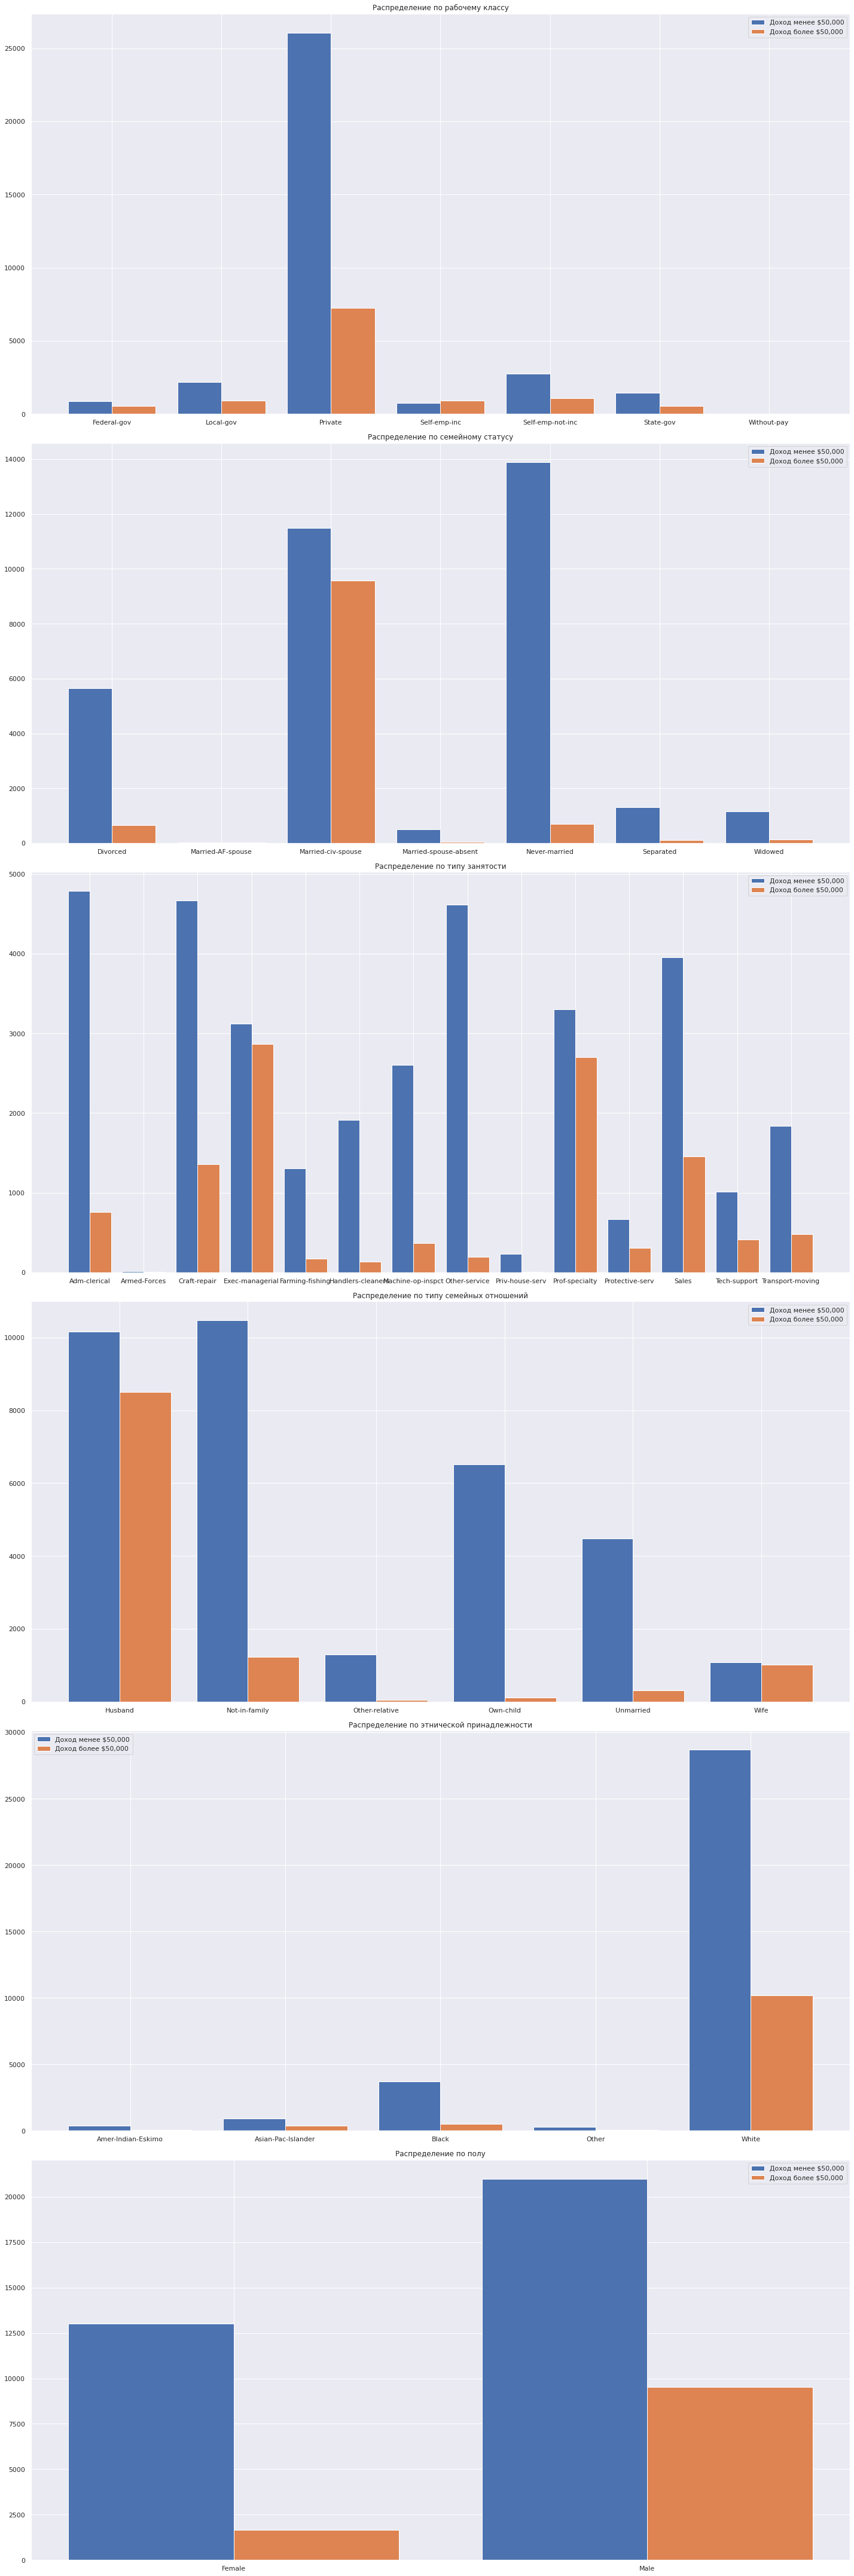

In [205]:
# Построение графиков по вышеуказанным группировкам данных:

fig, ax = plt.subplots(ncols=1, nrows=6, figsize=(20,60))
ax
ax[0].bar(workclass_groupped.index, workclass_groupped['income_<=50K'], width = -0.4, align='edge', label='Доход менее $50,000')
ax[0].bar(workclass_groupped.index, workclass_groupped['income_>50K'], width = 0.4, align='edge', label='Доход более $50,000')
ax[0].set_title('Распределение по рабочему классу')
ax[0].legend()

ax[1].bar(marital_status_groupped.index, marital_status_groupped['income_<=50K'], width = -0.4, align='edge', label='Доход менее $50,000')
ax[1].bar(marital_status_groupped.index, marital_status_groupped['income_>50K'], width = 0.4, align='edge', label='Доход более $50,000')
ax[1].set_title('Распределение по семейному статусу')
ax[1].legend()

ax[2].bar(occupation_groupped.index, occupation_groupped['income_<=50K'], width = -0.4, align='edge', label='Доход менее $50,000')
ax[2].bar(occupation_groupped.index, occupation_groupped['income_>50K'], width = 0.4, align='edge', label='Доход более $50,000')
ax[2].set_title('Распределение по типу занятости')
ax[2].legend()

ax[3].bar(relationship_groupped.index, relationship_groupped['income_<=50K'], width = -0.4, align='edge', label='Доход менее $50,000')
ax[3].bar(relationship_groupped.index, relationship_groupped['income_>50K'], width = 0.4, align='edge', label='Доход более $50,000')
ax[3].set_title('Распределение по типу семейных отношений')
ax[3].legend()

ax[4].bar(race_groupped.index, race_groupped['income_<=50K'], width = -0.4, align='edge', label='Доход менее $50,000')
ax[4].bar(race_groupped.index, race_groupped['income_>50K'], width = 0.4, align='edge', label='Доход более $50,000')
ax[4].set_title('Распределение по этнической принадлежности')
ax[4].legend()

ax[5].bar(gender_groupped.index, gender_groupped['income_<=50K'], width = -0.4, align='edge', label='Доход менее $50,000')
ax[5].bar(gender_groupped.index, gender_groupped['income_>50K'], width = 0.4, align='edge', label='Доход более $50,000')
ax[5].set_title('Распределение по полу')
ax[5].legend()

plt.tight_layout()

In [206]:
# Сводные таблицы по разным признакам:

# 1. Род деятельности + семейное положение:

pivot_edu_occup = pd.pivot_table(X, values=['income_<=50K', 'income_>50K'], index='occupation', columns='marital-status', aggfunc=np.sum)

In [207]:
pivot_edu_occup

income_<=50K                                       \
marital-status        Divorced Married-AF-spouse Married-civ-spouse   
occupation                                                            
Adm-clerical            1145.0               5.0              822.0   
Armed-Forces               NaN               NaN                2.0   
Craft-repair             611.0               2.0             2537.0   
Exec-managerial          674.0               0.0             1125.0   
Farming-fishing           85.0               0.0              714.0   
Handlers-cleaners        193.0               1.0              582.0   
Machine-op-inspct        423.0               1.0             1095.0   
Other-service            732.0               3.0              897.0   
Priv-house-serv           44.0               NaN               24.0   
Prof-specialty           613.0               0.0              905.0   
Protective-serv          105.0               1.0              308.0   
Sales                    573.0               4.0             1203.0   
Tech-support             210.0               NaN              249.0   
Transport-moving         234.0               1.0             1028.0   

                                                                         \
marital-status    Married-spouse-absent Never-married Separated Widowed   
occupation                                                                
Adm-clerical                       81.0        2281.0     212.0   238.0   
Armed-Forces                        NaN           8.0       NaN     NaN   
Craft-repair                       64.0        1240.0     147.0    64.0   
Exec-managerial                    35.0        1064.0     101.0   118.0   
Farming-fishing                    32.0         419.0      22.0    36.0   
Handlers-cleaners                  31.0        1017.0      63.0    24.0   
Machine-op-inspct                  33.0         850.0     121.0    82.0   
Other-service                      86.0        2380.0     266.0   248.0   
Priv-house-serv                     9.0          92.0      21.0    39.0   
Prof-specialty                     41.0        1538.0     106.0   101.0   
Protective-serv                     6.0         218.0      21.0    10.0   
Sales                              47.0        1859.0     137.0   130.0   
Tech-support                        8.0         467.0      45.0    30.0   
Transport-moving                   25.0         464.0      50.0    36.0   

                  income_>50K                                       \
marital-status       Divorced Married-AF-spouse Married-civ-spouse   
occupation                                                           
Adm-clerical             36.0               1.0              650.0   
Armed-Forces              NaN               NaN                4.0   
Craft-repair             59.0               2.0             1230.0   
Exec-managerial         209.0               3.0             2413.0   
Farming-fishing           5.0               1.0              155.0   
Handlers-cleaners         4.0               0.0              127.0   
Machine-op-inspct         7.0               0.0              344.0   
Other-service            18.0               2.0              151.0   
Priv-house-serv           0.0               NaN                2.0   
Prof-specialty          173.0               4.0             2185.0   
Protective-serv          16.0               0.0              270.0   
Sales                    87.0               1.0             1244.0   
Tech-support             23.0               NaN              350.0   
Transport-moving         18.0               0.0              439.0   

                                                                         
marital-status    Married-spouse-absent Never-married Separated Widowed  
occupation                                                               
Adm-clerical                        2.0          47.0       8.0    12.0  
Armed-Forces                        NaN        

In [208]:
# Распределение опрошенных с высоким и низким уровнем дохода по количеству рабочих часов в неделю (распределение близко к нормальному, с средним значением в районе 31-50 часов в неделю)

pivot_hpw = pd.pivot_table(X, values=['income_<=50K', 'income_>50K'], index='hours_per_week_cat', aggfunc=np.sum)

In [209]:
pivot_hpw

,income_<=50K,income_>50K
hours_per_week_cat,,
<=10,711.0,66.0
11-30,5394.0,364.0
31-50,24863.0,8623.0
51-70,2584.0,1902.0
>70,462.0,253.0


In [210]:
# Род деятельности + количество рабочих часов в неделю:

pivot_occup_hpw = pd.pivot_table(X, values=['income_<=50K', 'income_>50K'], index='occupation', columns='hours_per_week_cat', aggfunc=np.sum)

In [211]:
pivot_occup_hpw

income_<=50K                               income_>50K  \
hours_per_week_cat         <=10   11-30   31-50  51-70    >70        <=10   
occupation                                                                  
Adm-clerical              108.0   779.0  3730.0  153.0   14.0         6.0   
Armed-Forces                1.0     NaN     8.0    1.0    NaN         0.0   
Craft-repair               41.0   290.0  3934.0  355.0   45.0         4.0   
Exec-managerial            46.0   243.0  2401.0  379.0   48.0        15.0   
Farming-fishing            31.0   167.0   764.0  239.0  107.0         2.0   
Handlers-cleaners          33.0   381.0  1411.0   77.0    9.0         0.0   
Machine-op-inspct          21.0   166.0  2302.0  109.0    7.0         0.0   
Other-service             153.0  1495.0  2738.0  173.0   53.0         2.0   
Priv-house-serv            24.0    86.0   102.0   10.0    7.0         0.0   
Prof-specialty            108.0   462.0  2366.0  312.0   56.0        26.0   
Protective-serv             7.0    68.0   515.0   62.0   17.0         1.0   
Sales                     102.0   951.0  2461.0  403.0   36.0         7.0   
Tech-support               26.0   121.0   810.0   43.0    9.0         0.0   
Transport-moving           10.0   185.0  1321.0  268.0   54.0         3.0   

                                                
hours_per_week_cat  11-30   31-50  51-70   >70  
occupation                                      
Adm-clerical         53.0   646.0   46.0   5.0  
Armed-Forces          NaN     4.0    0.0   NaN  
Craft-repair         11.0  1167.0  152.0  21.0  
Exec-managerial      58.0  2110.0  636.0  48.0  
Farming-fishing       5.0    82.0   64.0  19.0  
Handlers-cleaners     4.0   118.0   10.0   3.0  
Machine-op-inspct     3.0   335.0   23.0   4.0  
Other-service        23.0   138.0   26.0   7.0  
Priv-house-serv       1.0     2.0    0.0   0.0  
Prof-specialty      111.0  2083.0  432.0  52.0  
Protective-serv       4.0   232.0   53.0  17.0  
Sales                56.0  1024.0  327.0  41.0  
Tech-support         25.0   349.0   28.0   9.0  
Transport-moving     10.0   333.0  105.0  27.0

In [212]:
# Хитмапы по вышеуказанной сводной таблице (род деятельности + кол-во рабочих часов в неделю, разделил на низкий и высокий доход)

# 1. Хитмап для высокого дохода:

pivot_occup_hpw_high_income = pd.pivot_table(X, values='income_>50K', index='occupation', columns='hours_per_week_cat', aggfunc=np.sum)

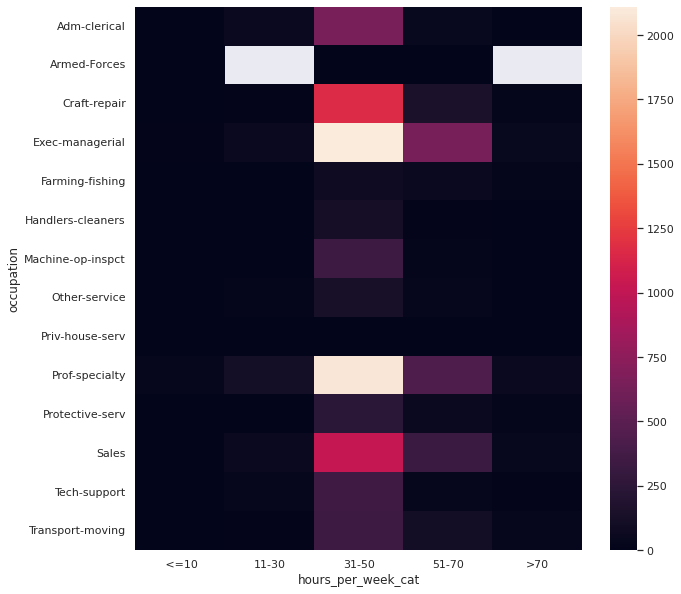

In [213]:
plt.figure(figsize=(10,10))
sns.heatmap(pivot_occup_hpw_high_income)

In [214]:
# 1. Хитмап для низкого дохода:

pivot_occup_hpw_low_income = pd.pivot_table(X, values='income_<=50K', index='occupation', columns='hours_per_week_cat', aggfunc=np.sum)

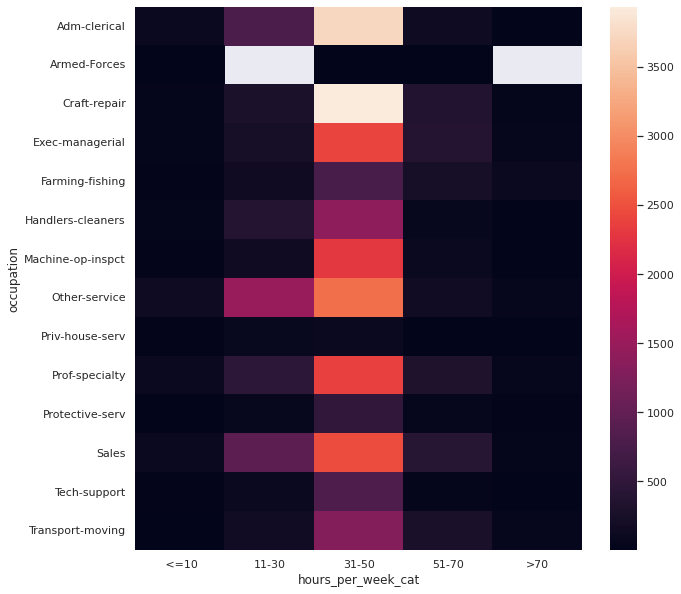

In [215]:
plt.figure(figsize=(10,10))
sns.heatmap(pivot_occup_hpw_low_income)

In [216]:
# Гендерно-расистское разделение - уровень дохода в зависимости от пола и этнической группы ((( :
    
pivot_race_gender = pd.pivot_table(X, values=['income_<=50K', 'income_>50K'], index='race', columns='gender', aggfunc=np.sum)

In [217]:
pivot_race_gender

income_<=50K          income_>50K        
gender                   Female     Male      Female    Male
race                                                        
Amer-Indian-Eskimo        152.0    230.0        14.0    39.0
Asian-Pac-Islander        371.0    563.0        65.0   304.0
Black                    1958.0   1736.0       126.0   408.0
Other                     117.0    191.0         9.0    36.0
White                   10428.0  18268.0      1455.0  8752.0

Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

Обучите модели логистической регрессии и опорных векторов на обучающем множестве.

Для тестового множества предскажите уровень дохода и сравните с истинным значением, посчитав точность предсказания моделей. Для этого используйте встроенную функцию score.

In [218]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline

model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

1) Логистическая регрессия

In [219]:
le = LabelEncoder()

In [220]:
selectedColumns = adult_data[['education', 'occupation', 'fnlwgt', 'hours-per-week', 'income']]

In [221]:
X_data = pd.get_dummies(selectedColumns, columns=['education', 'occupation'])

In [222]:
X_data.head()

,fnlwgt,hours-per-week,income,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,...,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,226802,40,<=50K,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,89814,50,<=50K,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,336951,40,>50K,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,160323,40,>50K,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,198693,30,<=50K,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [223]:
del X_data['income']

In [224]:
le.fit(adult_data['income'])

LabelEncoder()

In [225]:
le.classes_

array(['<=50K', '>50K'], dtype=object)

In [226]:
le.transform(['<=50K', '<=50K', '<=50K', '>50K'])

array([0, 0, 0, 1])

In [227]:
y = pd.Series(data=le.transform(adult_data['income']))

In [228]:
y.head()

0    0
1    0
2    1
3    1
4    0
dtype: int64

In [229]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.2, random_state=42)

In [230]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [231]:
model.predict_proba(X_test)

array([[0.95061747, 0.04938253],
       [0.91972839, 0.08027161],
       [0.72979684, 0.27020316],
       ...,
       [0.82047097, 0.17952903],
       [0.53469549, 0.46530451],
       [0.9009474 , 0.0990526 ]])

In [232]:
model.score(X_train, y_train)

0.7805511789258368

In [233]:
model.score(X_test, y_test)

0.7851851851851852

2) Метод опорных векторов

In [236]:
from sklearn.svm import SVC

In [259]:
clf = make_pipeline(StandardScaler(), SVC(degree=7))

In [260]:
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC(degree=7))])

In [261]:
clf_predictions = clf.predict(X_test)
clf_predictions

array([0, 0, 0, ..., 0, 0, 0])

In [262]:
clf.score(X_train, y_train)

0.7840893385300053

In [263]:
clf.score(X_test, y_test)

0.7858485351022665

In [265]:
# Выводы по логистической регрессии и методу опорных векторов:
# 1. Большее количество признаков позволяет более точно предсказать, к какой группе принадлежит индивид из тестовой группы
# 2. Выбранные категории данных ['education', 'occupation', 'fnlwgt', 'hours-per-week', 'income'] позволяют достаточно точно предсказывать принадлежность к группе по доходу
# 3. Логистическая регрессия имеет несколько более точный процент предсказаний
# 4. Метод стандартизации выборки StandardScaler() позволяет повысить стабильность обучающей модели и несколько повысить точность предсказаний